# Predicting Default in Online Personal Loans

In [611]:
import os 

# Analytic tools
%matplotlib inline

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

## Data Preprocessing

In [612]:
# import datasets
dta = pd.read_csv("lending_club\\loan.csv")

print(dta.shape)
dta.head()

(39717, 111)


C:\Users\Danie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [613]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [614]:
dta.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [615]:
dta.describe(exclude = np.number)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,...,39706,39717,39717,39717,39667,39717,39646,1140,39715,39717
unique,2,371,7,35,28820,11,5,3,55,3,...,19615,823,50,526,1089,1,101,2,106,1
top,36 months,10.99%,B,B3,US Army,10+ years,RENT,Not Verified,Dec-11,Fully Paid,...,Debt Consolidation,100xx,CA,Nov-98,0%,f,May-16,Jun-16,May-16,INDIVIDUAL
freq,29096,956,12020,2917,134,8879,18899,16921,2260,32950,...,2184,597,7099,370,977,39717,1256,1125,10308,39717


In [616]:
print(dta['member_id'].nunique())
dta['member_id'].nunique() == dta.shape[0] # assert member_id is primary key

39717


True

## Missing Values

In [617]:
import missingno as msno

<AxesSubplot:>

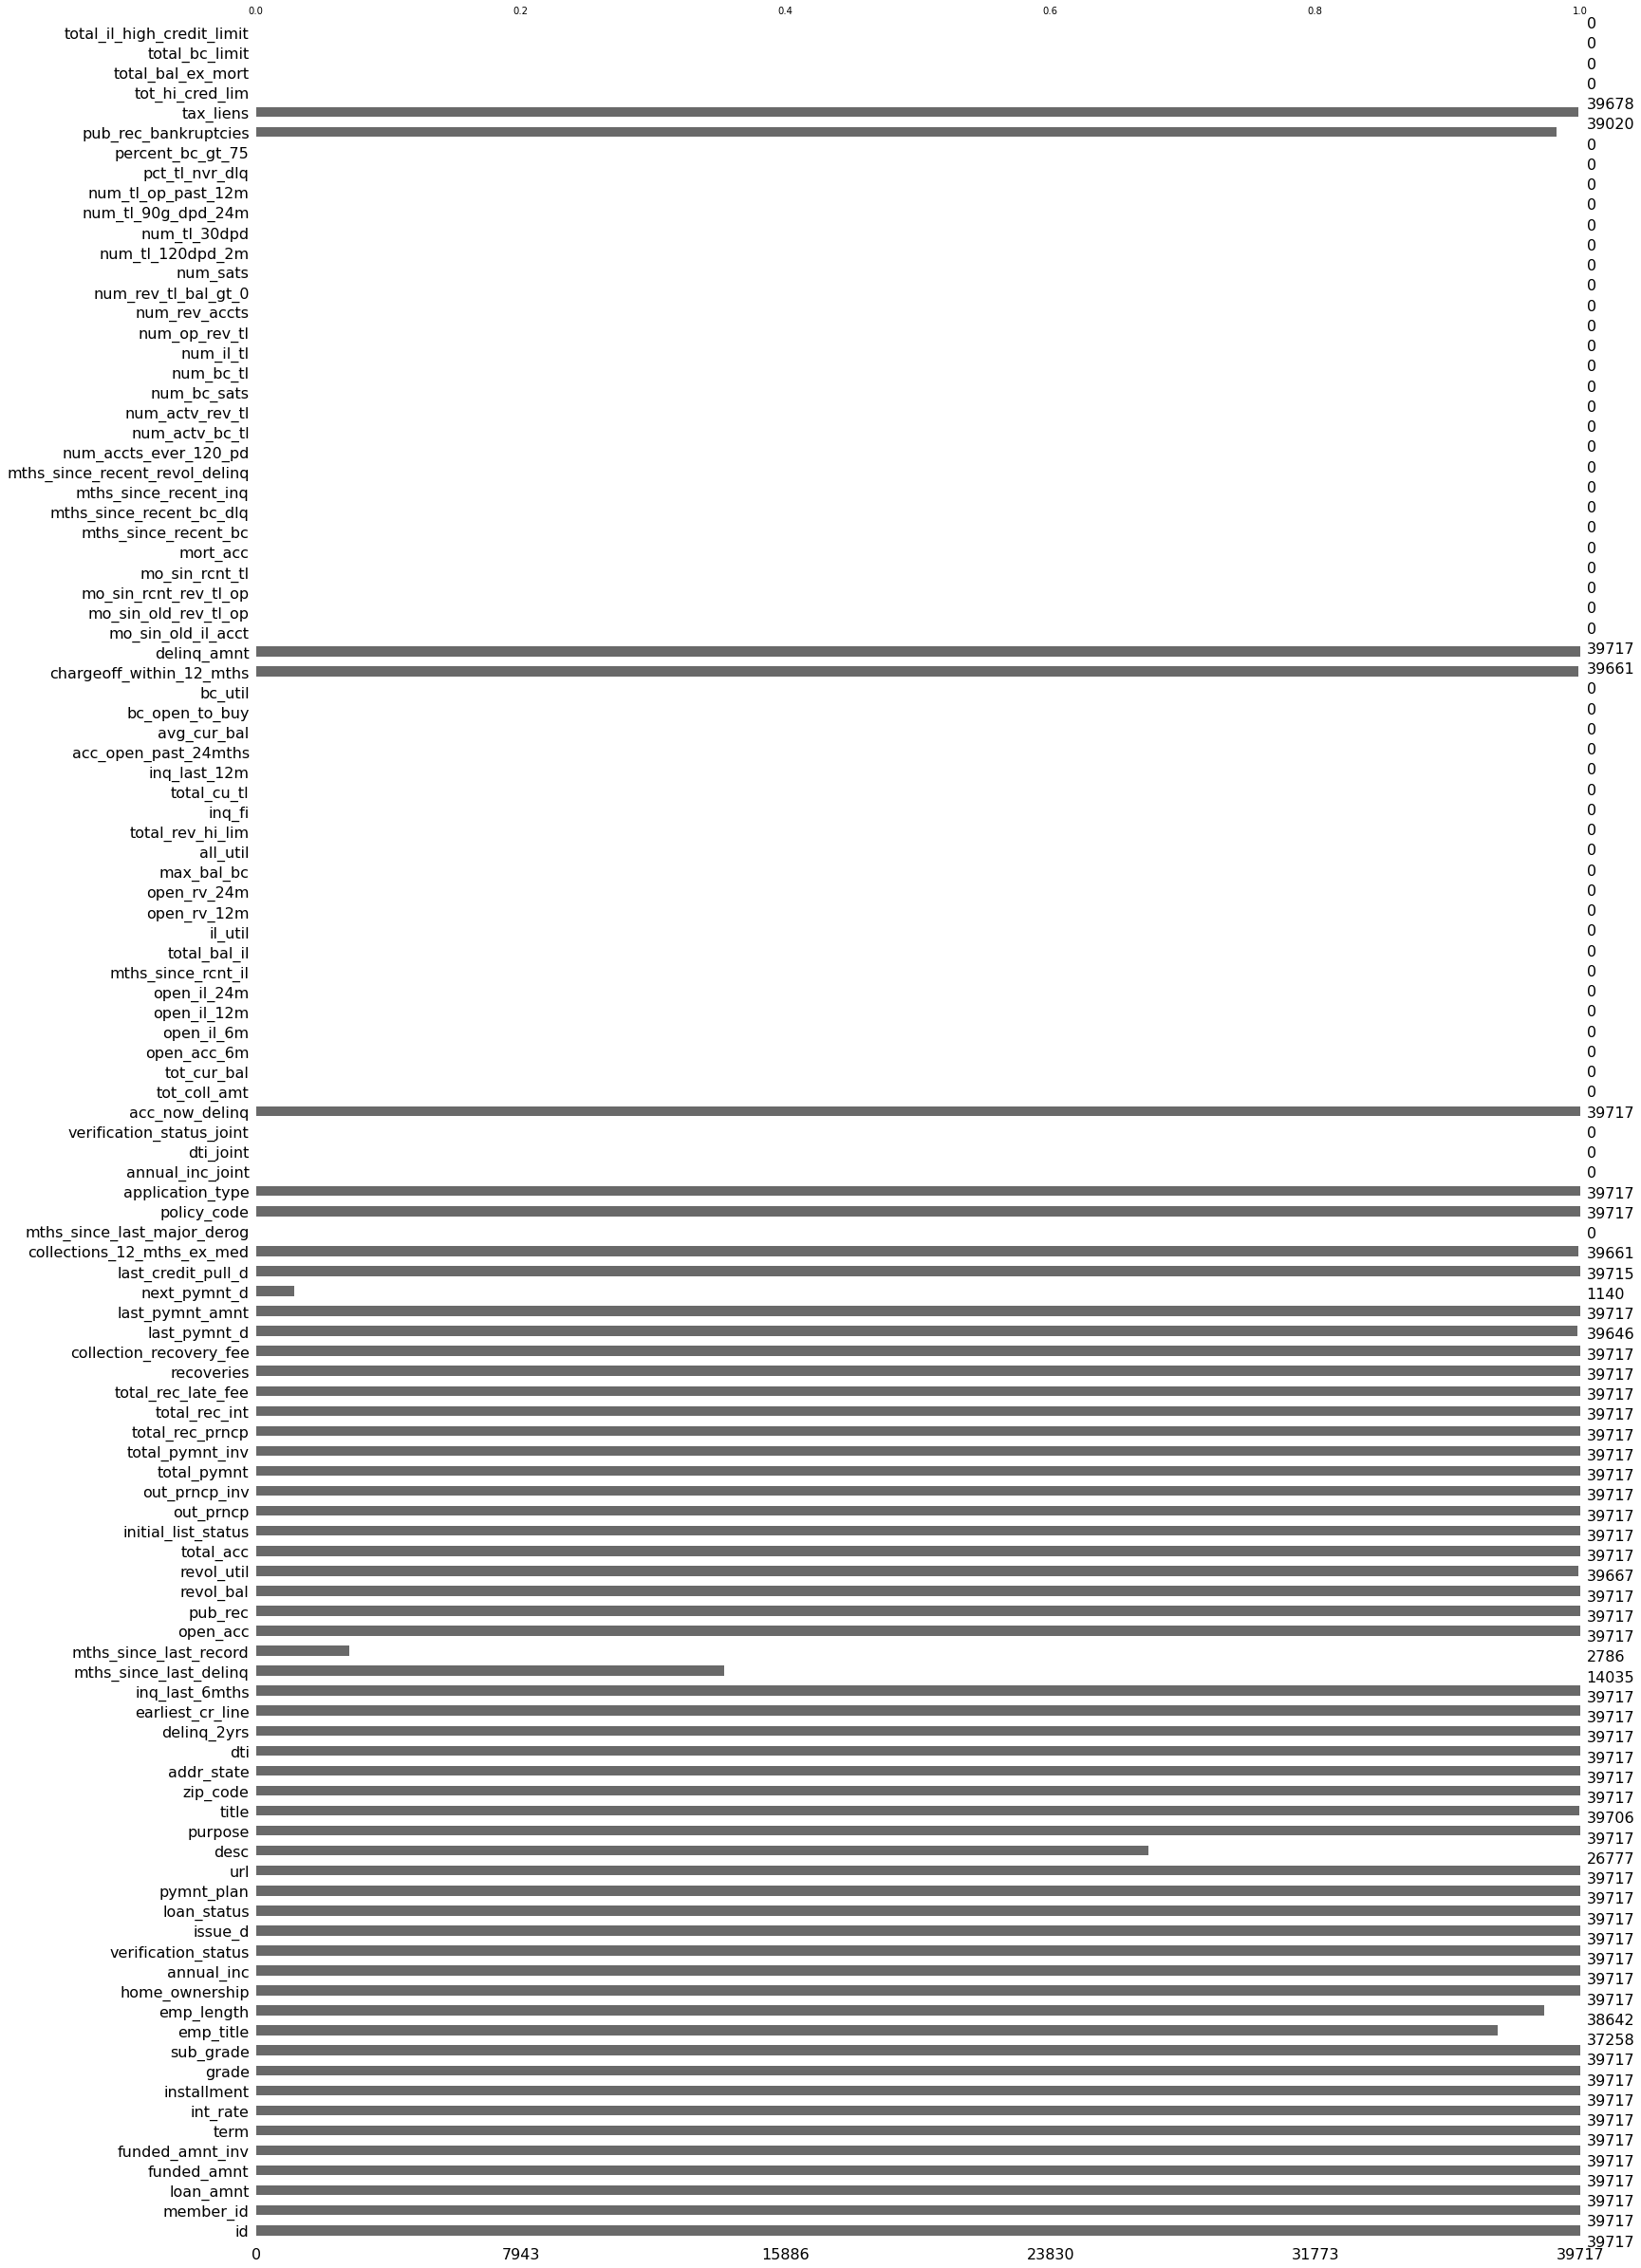

In [618]:
msno.bar(dta)

In [619]:
dta.isna().head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True


In [620]:
# drop columns with all missing values 
dta.dropna(axis = 1, how='all', inplace = True)

In [621]:
dta.shape

(39717, 57)

In [622]:
missing = []

for i, j in enumerate(dta.isna().sum() / dta.shape[0]):
    if j == 0:
        continue
        
    missing.append((dta.columns[i], j))

sorted(missing, key = lambda x: x[1], reverse = True)

[('next_pymnt_d', 0.971296925749679),
 ('mths_since_last_record', 0.9298537150338646),
 ('mths_since_last_delinq', 0.6466248709620566),
 ('desc', 0.3258050708764509),
 ('emp_title', 0.06191303472064859),
 ('emp_length', 0.027066495455346576),
 ('pub_rec_bankruptcies', 0.017549160309187503),
 ('last_pymnt_d', 0.001787647606818239),
 ('collections_12_mths_ex_med', 0.0014099755772087519),
 ('chargeoff_within_12_mths', 0.0014099755772087519),
 ('revol_util', 0.0012589067653649571),
 ('tax_liens', 0.0009819472769846665),
 ('title', 0.00027695948838029054),
 ('last_credit_pull_d', 5.0356270614598286e-05)]

## Handling missing values

Three ways (to my knowledge) to handle missing data:

1) Delete Rows (listwise). <br>
2) Imputation. The risk with this is underestimating variance in features, if missing values are imputed using means/modes. <br>
3) If categorical variable, make NA a class


Also, there's no need to deal with missing data if it doesn't become a feature. Thus, investigate each var, and make judgment call.


In [623]:
dta['next_pymnt_d'] # won't be a feature, thus no need to handle

0           NaN
1           NaN
2           NaN
3           NaN
4        Jun-16
          ...  
39712       NaN
39713       NaN
39714       NaN
39715       NaN
39716       NaN
Name: next_pymnt_d, Length: 39717, dtype: object

In [624]:
dta['mths_since_last_record'].describe()
# dta['mths_since_last_record'].isnull().sum()

# this is months since last public record, thus the vast majority of missing means these people
# do not have a public record. So this makes sense.

dta['has_pub_rec'] = dta['mths_since_last_record'].notnull().astype(int)
dta['has_delin'] = dta['mths_since_last_delinq'].notnull().astype(int)

In [625]:
dta['desc']
dta['desc'][0]
dta['desc'][1]

# Now this one is interesting. It is the personal message that went along with the loan request.
# Potentially, text analysis can be performed with this field.

dta['has_desc'] = dta['desc'].notnull().astype(int)

In [626]:
dta['emp_title']
dta['emp_length']
# employer info. leave as is

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [627]:
# Bankruptcies
dta['pub_rec_bankruptcies'].fillna(0, inplace = True)

In [628]:
# All the rest have only <.1% of rows missing. Can safely impute or ignore (if not feature)
mode =  dta['collections_12_mths_ex_med'].mode()
dta['collections_12_mths_ex_med'].fillna(mode, inplace = True)

In [629]:
mode =  dta['chargeoff_within_12_mths'].mode()
dta['chargeoff_within_12_mths'].fillna(mode, inplace = True)

In [630]:
dta['revol_util'] = dta['revol_util'].str.rstrip('%').astype('float') / 100

In [631]:
mean = dta['revol_util'].mean()
dta['revol_util'].fillna(mean, inplace = True)

In [632]:
dta['int_rate'] = dta['int_rate'].str.rstrip('%').astype('float') / 100

In [633]:
mode = dta['tax_liens'].mode()
dta['tax_liens'].fillna(mode, inplace = True)

### Exploratory Data Analysis - Summary Stats

In [634]:
import sidetable

In [635]:
dta.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens',
 'has_pub_rec',
 'has_delin',
 'has_desc

In [636]:
dta.stb.freq(['grade'])

,grade,count,percent,cumulative_count,cumulative_percent
0,B,12020,30.264119,12020,30.264119
1,A,10085,25.392149,22105,55.656268
2,C,8098,20.389254,30203,76.045522
3,D,5307,13.362036,35510,89.407558
4,E,2842,7.155626,38352,96.563185
5,F,1049,2.641186,39401,99.204371
6,G,316,0.795629,39717,100.000000


In [637]:
dta.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
policy_code,39717,1,1,39717,1,39717
tax_liens,39678,1,0.0,39678,0.0,39678
collections_12_mths_ex_med,39661,1,0.0,39661,0.0,39661
delinq_amnt,39717,1,0,39717,0,39717
chargeoff_within_12_mths,39661,1,0.0,39661,0.0,39661
acc_now_delinq,39717,1,0,39717,0,39717
pymnt_plan,39717,1,n,39717,n,39717
initial_list_status,39717,1,f,39717,f,39717
application_type,39717,1,INDIVIDUAL,39717,INDIVIDUAL,39717
has_desc,39717,2,1,26777,0,12940


### Exploratory Data Analysis - Preliminary Visualizations

``line`` - line plot (default) <br>
``bar`` - vertical bar plot <br>
``barh`` - horizontal var plot <br>
``hist`` - histogram <br>
``box`` - box plot <br>
``kde`` - Kernel Density Estimate <br>
``area`` - Area <br>
``pie`` - Pie <br>
``scatter`` - Scatter plot




In [638]:
plt.rcParams
plt.rcParams['figure.figsize'] = 10, 5

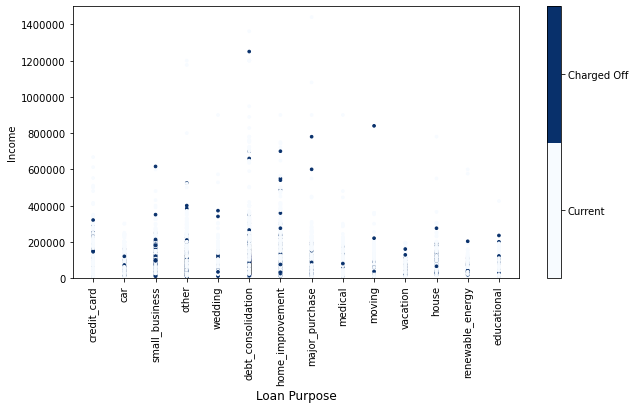

In [639]:
# Purpose and income

# categorical color bar (helpful link): https://gist.github.com/jakevdp/8a992f606899ac24b711

# manual one-hot encoding
dta['target'] = np.where(dta['loan_status'].isin(['Charged Off']), 1, 0)

plt.ticklabel_format(style = 'plain')
plt.scatter(x = dta['purpose'], y= dta['annual_inc'], \
            c = dta['target'], cmap = plt.cm.get_cmap('Blues', 2), s = 7)

names = ['Current','Charged Off']
formatter = plt.FuncFormatter(lambda val, loc: names[val])

plt.colorbar(ticks=[0, 1], format = formatter)
plt.clim(-0.5, 1.5)

plt.xticks(rotation = 'vertical')
plt.ylim(0,1.5e6)

plt.ylabel('Income')
plt.xlabel('Loan Purpose', size= 12)

plt.show()

14.00062377821221
13.201979759460295


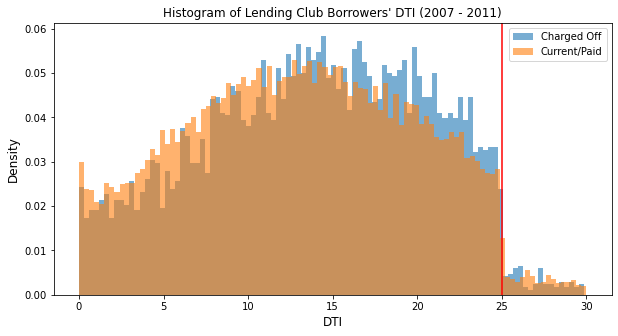

In [919]:
# Compare distributions of people who are able to pay back v.s. not able 
dta['loan_status'].unique()

print(dta[dta['loan_status'] == 'Charged Off']['dti'].mean())
print(dta[dta['loan_status'] != 'Charged Off']['dti'].mean())

plt.hist(dta[dta['loan_status'] == 'Charged Off']['dti'], \
         bins = 100, alpha = 0.6, density = True, label = 'Charged Off')
plt.hist(dta[dta['loan_status'] != 'Charged Off']['dti'], \
         bins = 100, alpha = 0.6, density = True, label = 'Current/Paid')

plt.axvline(x=25, color = 'red')

plt.legend()

plt.xlabel('DTI', size = 12)
plt.ylabel('Density', size = 12)
plt.title("Histogram of Lending Club Borrowers' DTI (2007 - 2011)")

plt.show()

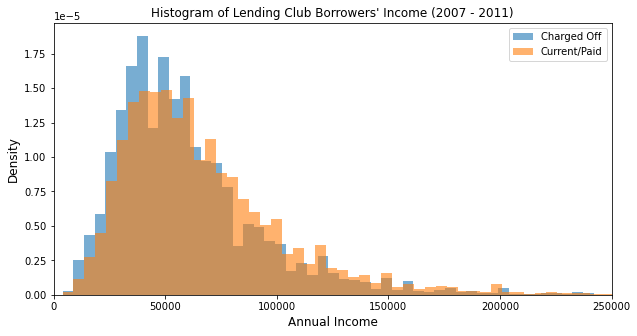

In [920]:
plt.hist(dta[(dta['loan_status'] == 'Charged Off') & (dta['annual_inc'] < 250000)]['annual_inc'], \
         bins = 50, alpha = 0.6, density = True, label = 'Charged Off')

plt.hist(dta[(dta['loan_status'] != 'Charged Off') & (dta['annual_inc'] < 250000)]['annual_inc'], \
         bins = 50, alpha = 0.6, density = True, label = 'Current/Paid')

plt.legend()

plt.xlabel('Annual Income', size = 12)
plt.ylabel('Density', size = 12)
plt.title("Histogram of Lending Club Borrowers' Income (2007 - 2011)")
plt.xlim(0,250000)

plt.show()

### Interactive Visualization

In [642]:
import ipywidgets as widgets

In [643]:
def plot_bar(x, y, hue):
    g = sns.barplot(data=dta, x=x, y=y, hue=hue, ci='sd')
    plt.setp(g.get_xticklabels(), rotation='vertical', size = 10)


numeric_columns = dta.select_dtypes(include='number').columns
str_columns = dta.select_dtypes(exclude='number').columns

widgets.interact(plot_bar,
                 x = str_columns,
                 y = numeric_columns,
                 hue = str_columns)

# It seems those that are getting a personal loan for education are 
# writing the most descriptions, and also charging off the most.

interactive(children=(Dropdown(description='x', options=('term', 'grade', 'sub_grade', 'emp_title', 'emp_lengt…

<function __main__.plot_bar(x, y, hue)>

## Feature Engineering

#### Feature Engineering tools

In [644]:
# Handling Class Imbalance
from sklearn.utils import resample

# Feature Engineering
from sklearn.tree import DecisionTreeClassifier

### Class Rebalancing

Before feature selection, rebalance classes otherwise it'll be hard to learn defaults/charge-offs as they are quite rare.

In [645]:
# up-sampling
currents = dta[dta['target'] == 0]
defaults = dta[dta['target'] == 1]

In [646]:
from sklearn.utils import shuffle

upsampled_dta = resample(defaults, replace = True, n_samples = currents.shape[0], random_state = 99999)
upsampled_dta = pd.concat([currents, upsampled_dta])
upsampled_dta['target'].value_counts()

upsampled_dta = shuffle(upsampled_dta)

In [647]:
upsampled_dta.dtypes
upsampled_dta.describe().T

,count,mean,std,min,25%,50%,75%,max
id,68180.0,688968.408874,213039.099785,54734.0000,521761.2500,676925.0000,8.443988e+05,1.077501e+06
member_id,68180.0,857378.352449,268467.104302,70699.0000,674277.7500,864558.5000,1.054476e+06,1.314167e+06
loan_amnt,68180.0,11587.579935,7735.613082,500.0000,5500.0000,10000.0000,1.550000e+04,3.500000e+04
funded_amnt,68180.0,11280.530214,7434.863013,500.0000,5500.0000,10000.0000,1.500000e+04,3.500000e+04
funded_amnt_inv,68180.0,10580.632889,7355.459529,0.0000,5000.0000,9000.0000,1.482851e+04,3.500000e+04
int_rate,68180.0,0.127717,0.038013,0.0542,0.1025,0.1269,1.533000e-01,2.459000e-01
installment,68180.0,329.239052,211.978084,15.6900,167.7300,286.3600,4.418900e+02,1.305190e+03
annual_inc,68180.0,66120.552816,56695.920981,4000.0000,40000.0000,56000.0000,8.000000e+04,6.000000e+06
dti,68180.0,13.615058,6.633950,0.0000,8.5600,13.8000,1.891250e+01,2.999000e+01
delinq_2yrs,68180.0,0.156439,0.507377,0.0000,0.0000,0.0000,0.000000e+00,1.100000e+01


### Feature Selection
<br>
<br>
<b>Business Perspective</b>: What happens during a loan application? Fundamentally, the intermediary is selling the ability to shift capital through time to the borrower. The borrower wants to maximize this flexibility regardless of their "type" (creditworthy vs uncreditworthy) which only they observe. The intermediary's goal is to accurately determine the borrower's type. I conjecture that the following points would hold:

1) The borrower only furnishes additional information if it acts as a positive signal of creditworthiness. <br>
2) If the intermediary's screening technology is imperfect, uncreditworthy borrowers will lie to try to pool themselves with credit worthy borrowers. <br>


The combination of the two points above suggest information in which the applicant can choose what to signal (e.g. <b> soft information </b>), such as a description for their loan purpose, is likely to be very informative to detect "uncreditworthy" behavior such as deception. 

An important point to keep in mind is that this dataset is over a set of individuals whom successfully applied for a loan, suggesting deception is particularly salient.

<br>
<br>
<b>Engineering Perspective</b>: What tools can we use to determine feature importance?  

1) Decision tree classifiers <br>
2) PCA <br>
3) Subset selection


### Filter features by low variance first

In [648]:
dta.var().sort_values()

acc_now_delinq                0.000000e+00
chargeoff_within_12_mths      0.000000e+00
tax_liens                     0.000000e+00
collections_12_mths_ex_med    0.000000e+00
delinq_amnt                   0.000000e+00
policy_code                   0.000000e+00
int_rate                      1.387432e-03
pub_rec_bankruptcies          4.104791e-02
pub_rec                       5.626382e-02
has_pub_rec                   6.522743e-02
revol_util                    8.017275e-02
target                        1.216080e-01
has_desc                      2.196617e-01
has_delin                     2.285069e-01
delinq_2yrs                   2.418786e-01
inq_last_6mths                1.145369e+00
open_acc                      1.936249e+01
dti                           4.460361e+01
total_rec_late_fee            5.314380e+01
total_acc                     1.299990e+02
mths_since_last_delinq        4.848830e+02
mths_since_last_record        1.920414e+03
collection_recovery_fee       2.210324e+04
installment

In [1086]:
# Some of the feature selection has 
# already been done in the missing data cleaning part
# Leave 'sub_grade' out, since that is Lending Club's proprietary scoring method

# only keep ID for merging later on, but do not use as a feature

features = ['id',
            'loan_amnt',
            'term',            
            'emp_length',
            'home_ownership',
            'annual_inc',
            'dti',
            'has_desc',
            'has_delin',
            'inq_last_6mths',            
            'open_acc',            
            'revol_bal',
            'revol_util',
            'total_acc',                                    
            'addr_state',
            'purpose']

<function matplotlib.pyplot.show(close=None, block=None)>

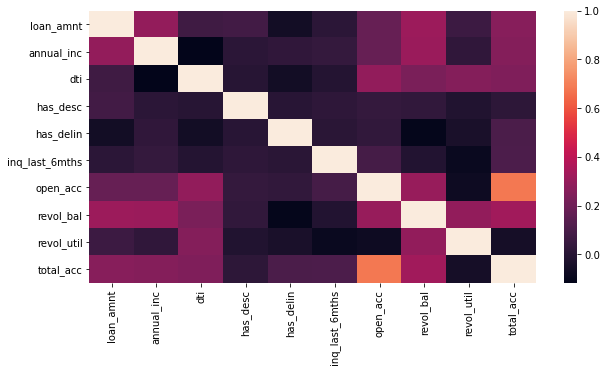

In [1087]:
# feature correlation - drop (one of) features with high multicollinearity 
fig, ax = plt.subplots()
sns.heatmap(upsampled_dta[features].drop('id',1).corr(), ax = ax)
plt.show

In [1088]:
upsampled_dta[features].dtypes
my_features = upsampled_dta[features]

#encode the categorical vars
to_encode = ['home_ownership', 'emp_length', 'term', 'addr_state', 'purpose']
my_features = pd.get_dummies(my_features, columns = to_encode)

In [1089]:
# make sure there are no empty spaces in column headers
my_features.columns = my_features.columns.str.replace(" ", "_")
# my_features.columns.to_list()

In [1091]:
# absCorrWithTarget = []

# for var in my_features.columns.to_list():        
#     my_corr = abs(upsampled_dta['target'].corr(my_features[var]))    
#     absCorrWithTarget.append((var, my_corr))

# sorted(absCorrWithTarget, key = lambda x: x[1], reverse = True)

# some states have very low correlation with target such as Michigan. However,
# I'd have to get rid of all state dummies if I wish to get rid of the MI feature
# So i'll keep it there.


## Modelling

In this project, I will use the following models to predict loan default/charge-off:

1) <b>Logistic Regression</b> <br>
2) <b>Random Forest (RF)</b> <br>
3) <b>Extreme Gradient Boosting (XGBoost)</b> <br>

It will be interesting to compare the performance across these models, as it can answer some interesting questions. For instance: <br>

1) How much interpretability of our explanatory variables should we sacrifice for more sophisticated prediction machines?  <br>

2) How does RF compare against XGBoost in loan prediction? Will XGBoost overfit to the noise in the training set? 


In [654]:
# tools for sample splitting
from sklearn.model_selection import train_test_split

# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Performance Metrics
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer, roc_curve
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix  
from sklearn.metrics import accuracy_score, classification_report, log_loss

from sklearn.model_selection import GridSearchCV # cross val
from sklearn.metrics import plot_confusion_matrix # draw confusion matrix

In [1092]:
X = my_features.drop('id', 1)
y = upsampled_dta['target'].astype(int)

In [656]:
# 80% for training, 20% for hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 11)

# 10-fold cross val (no CV yet)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size = 0.1, random_state = 12)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(54544, 92)
(13636, 92)
(5455, 127)
(54544,)
(13636,)
(5455,)


### Logistic Regression

I use lbfgs since its a search algorithm with $O(n^2)$ complexity. This is less computationally expensive than the Newton loss method which takes $O(n^3)$ time. In my experience, it also performs better when there is class imbalance (since it is very likely some features have no variation in the target), although I have already upsampled the data. 

According to sklearns documentation, L2 regularization is already applied by default


In [657]:
log_reg = LogisticRegression(random_state = 999, solver = 'lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=999)

## Random Forest

In [658]:
rf = RandomForestClassifier(random_state = 123, max_depth = 20, n_estimators = 40)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=40, random_state=123)

## XGBoost 

In [659]:
X_train.columns = X_train.columns.str.replace(",", "")
X_train.columns = X_train.columns.str.replace(">", "")
X_train.columns = X_train.columns.str.replace("<", "")

X_test.columns = X_train.columns.str.replace(",", "")
X_test.columns = X_train.columns.str.replace(">", "")
X_test.columns = X_train.columns.str.replace("<", "")

In [660]:
xtreme = xgb.XGBClassifier(objective = 'binary:logistic', 
                            eval_metric = "logloss",
                            seed = 42, 
                            use_label_encoder = False)

xtreme.fit(X_train, 
           y_train, 
           verbose = True, 
           early_stopping_rounds = 20, 
           eval_metric= 'aucpr', 
           eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.66312
[1]	validation_0-aucpr:0.68392
[2]	validation_0-aucpr:0.69344
[3]	validation_0-aucpr:0.70217
[4]	validation_0-aucpr:0.70934
[5]	validation_0-aucpr:0.71690
[6]	validation_0-aucpr:0.72066
[7]	validation_0-aucpr:0.72604
[8]	validation_0-aucpr:0.72958
[9]	validation_0-aucpr:0.73434
[10]	validation_0-aucpr:0.73480
[11]	validation_0-aucpr:0.73910
[12]	validation_0-aucpr:0.74135
[13]	validation_0-aucpr:0.74413
[14]	validation_0-aucpr:0.74666
[15]	validation_0-aucpr:0.74872
[16]	validation_0-aucpr:0.75199
[17]	validation_0-aucpr:0.75541
[18]	validation_0-aucpr:0.75725
[19]	validation_0-aucpr:0.75952
[20]	validation_0-aucpr:0.76124
[21]	validation_0-aucpr:0.76358
[22]	validation_0-aucpr:0.76714
[23]	validation_0-aucpr:0.76950
[24]	validation_0-aucpr:0.77257
[25]	validation_0-aucpr:0.77431
[26]	validation_0-aucpr:0.77654
[27]	validation_0-aucpr:0.77791
[28]	validation_0-aucpr:0.77923
[29]	validation_0-aucpr:0.78074
[30]	validation_0-aucpr:0.78233
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=32,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

### Predict testing data points

Test over the original dataset rather than the upsampled one

In [661]:
# attach label back to X_test
# drop duplicates
# recreate y_test
temp = X_test.merge(y_test, left_index=True, right_index=True)
temp.drop_duplicates(inplace=True)

y_test = temp['target']
X_test = temp.drop('target', 1)

In [662]:
logit_y_pred = log_reg.predict(X_test)
rf_y_pred = rf.predict(X_test)
xgb_y_pred = xtreme.predict(X_test)

logit_probs = log_reg.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)
xgb_probs = xtreme.predict_proba(X_test)

## Evaluation: Confusion Matrix and AUC

In [663]:
def plot_conf_mtx(cm, preds, classes = None, title = 'Confusion Matrix'):
    
    """ plot confusion matrix"""    
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels = classes, yticklabels = classes, vmin = 0, vmax = 1., annot = True, annot_kws={'size':50})        
    else:
        sns.heatmap(cm, vmin = 0., vmax = 1.)
   
    print(confusion_matrix(y_test, preds))

    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')  
    plt.show()
     
    precision = confusion_matrix(y_test, preds)[1][1]/(confusion_matrix(y_test, preds)[1][0] + confusion_matrix(y_test, preds)[1][1])
    recall  = confusion_matrix(y_test, preds)[1][1]/(confusion_matrix(y_test, preds)[0][1] + confusion_matrix(y_test, preds)[1][1])

    print("Precision: ", precision) # out of all the data points flagged as positive, what proportion are indeed positive?
    print("Recall: ", recall) # out of all the data points that are actually positive, what proportion did you flag?
    print("AUC: ", roc_auc_score(y_test, preds)) # Trade-off b/t false positive and true positive rate
    

[[3906 2934]
 [1742 2196]]


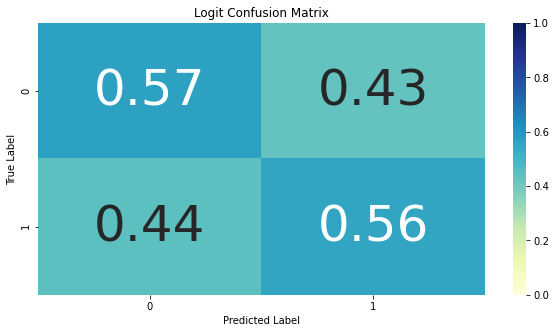

Precision:  0.5576434738445911
Recall:  0.4280701754385965
AUC:  0.5643480527117692
[[6001  839]
 [ 100 3838]]


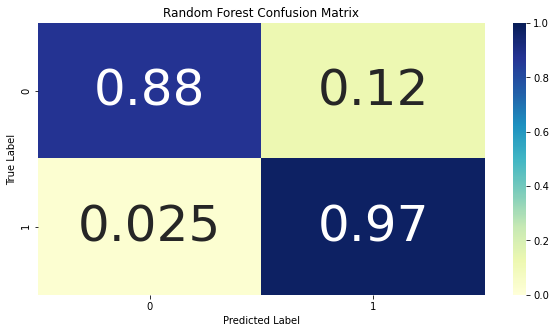

Precision:  0.9746063991874048
Recall:  0.820611503100278
AUC:  0.9259727902369773
[[5193 1647]
 [ 645 3293]]


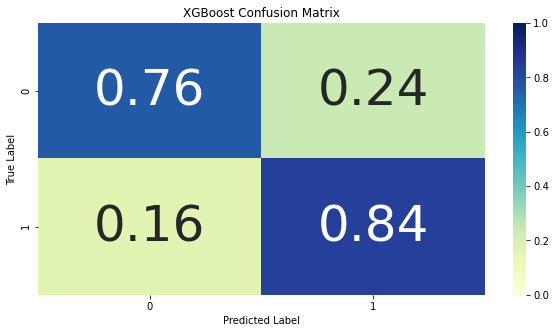

Precision:  0.8362112747587608
Recall:  0.6665991902834008
AUC:  0.797710900537275


In [664]:
logit_cm = confusion_matrix(y_test, logit_y_pred)
logit_cm_norm = logit_cm / logit_cm.sum(axis = 1).reshape(-1,1)
plot_conf_mtx(logit_cm_norm, logit_y_pred, classes = log_reg.classes_, title = "Logit Confusion Matrix")

rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm_norm = rf_cm / rf_cm.sum(axis = 1).reshape(-1,1)
plot_conf_mtx(rf_cm_norm, rf_y_pred, classes = rf.classes_, title = "Random Forest Confusion Matrix")

xgb_cm = confusion_matrix(y_test, xgb_y_pred)
xgb_cm_norm = xgb_cm / xgb_cm.sum(axis = 1).reshape(-1,1)
plot_conf_mtx(xgb_cm_norm, xgb_y_pred, classes = xtreme.classes_, title = "XGBoost Confusion Matrix")

## ROC Curve

In [665]:
# Create a diagonal line for random prediction
random_probs = [0 for _ in range(len(y_test))]

In [666]:
random_auc = roc_auc_score(y_test, random_probs)
logit_auc = roc_auc_score(y_test, logit_probs[:,1])
rf_auc = roc_auc_score(y_test, rf_probs[:,1])
xgb_auc = roc_auc_score(y_test, xgb_probs[:,1])

In [667]:
# retain just the positive probs
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs[:,1])
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs[:,1])

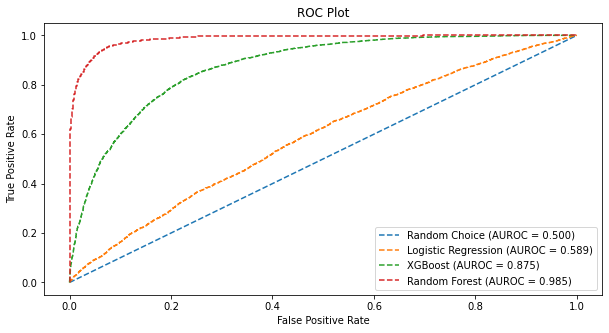

In [668]:
plt.plot(random_fpr, random_tpr, linestyle = '--', label='Random Choice (AUROC = %0.3f)' % (random_auc))
plt.plot(logit_fpr, logit_tpr, linestyle = '--', label='Logistic Regression (AUROC = %0.3f)' % (logit_auc))
plt.plot(xgb_fpr, xgb_tpr, linestyle = '--', label='XGBoost (AUROC = %0.3f)' % (xgb_auc))
plt.plot(rf_fpr, rf_tpr, linestyle = '--', label='Random Forest (AUROC = %0.3f)' % (rf_auc))

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Interestingly, Random Forest performs better than XGBoost. The likely reason is twofold: There are not enough defaulters (5,627 out of 39,717) and resampling marginally improves prediction for XGBoost, since XGBoost overfits to the noise. Thus, if there is a way to gather more systematic information about defaulters, this may improve the performance of XGBoost relative to Random Forests. 

# Using Text information as additional features

#### Can we use Statistical Learning to predict borrower behavior using the description provided in the online application?

Hard information such as FICO scores and DTI ratios provide easily quantifiable information, also known as <b>hard information</b>, to assess the creditworthiness of applicants. Some applicants with thin-files or barely passing underwriting criteria are difficult to screen. Loan officers play a critical role by evaluating the <b>soft information</b> of these hard-to-screen applicants, and use their best judgment to make a loan decision (Agarwal and Hauswald 2010). 

Can a machine do a loan officers job? In this section, I explore whether text information submitted by the applicant can systematically improve the prediction of default. Writing style and selection of words can be indicative of traits correlated with repayment behavior. I follow ``Netzer, Lemaire and Herzenstein (2019)`` and implement the following textual analysis method:

Select the most informative bigrams as features by ranking the following expression:


$ \large{
\frac{P(bigram|defaulted)}{P(bigram|repaid)}
}
$


In [797]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

import re
import string

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [798]:
stemmer = PorterStemmer()

In [799]:
upsampled_dta.reset_index(inplace=True)
raw_text = upsampled_dta['desc']

In [842]:
clean_text = raw_text.fillna('')

## Clean string

1) Trim external and internal spaces <br>
2) make everything lower case <br>
2) Get rid of punctuations

In [843]:
# lowercase
clean_text = [x.lower() for x in list(clean_text)]

In [844]:
# Exclude some markdown characters 
clean_text = [x.replace("<br>", "") for x in clean_text]
clean_text = [x.replace("<br/>", "") for x in clean_text]

In [845]:
# Exclude "borrower added on {date} >"

def remove_log(my_str):
    return re.sub(r"borrower added on [0-9][0-9]\/[0-9][0-9]\/[0-9][0-9] > ", "", my_str)

clean_text = [remove_log(x) for x in clean_text]

In [846]:
#trim internal and external spaces
clean_text = [" ".join(x.split()) for x in list(clean_text)]

In [847]:
# Get rid of punctuation
puncs = string.punctuation

numbers = '0123456789'

def strip_puncs(x):
    return ''.join(char for char in x if char not in (puncs or numbers))

clean_text = [strip_puncs(x) for x in clean_text]

In [848]:
# Lemmatize and remove stop words
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

new_list = []

for text in clean_text:    
    words = word_tokenize(text)
    
    new_text = []
    
    for word in words:
        if word not in stop_words:
            lem_word = lemmatizer.lemmatize(word)
            new_text.append(lem_word)
        
    new_list.append(" ".join(new_text))

## Bigrams

Use naive bayes to see which ones discriminate between charge-offs and paid off loans the best. Bigram count as features

In [849]:
from nltk.util import ngrams

In [850]:
paid_dict = {}
chgoff_dict = {}

bag_bigrams = list()

for index, desc in enumerate(new_list):
    
    token = nltk.word_tokenize(desc)
    bigrams = list(ngrams(token, 2))
    
    bag_bigrams += bigrams
    
    default = (upsampled_dta['target'][index] == 1).astype(int)
    paid = (upsampled_dta['target'][index] == 0).astype(int)    
    
    for bigram in bigrams:
        if bigram in paid_dict.keys():    
            paid_dict[bigram] += paid 
            chgoff_dict[bigram] += default
        else:                        
            paid_dict[bigram] = paid
            chgoff_dict[bigram] = default    
    

In [851]:
# convert to a set
bag_bigrams = set(bag_bigrams)

In [863]:
# now calculate the proportion

prop1_dict = {}
prop2_dict = {}

for bigram in bag_bigrams:
    if (paid_dict[bigram] >=1) and (chgoff_dict[bigram] >=1):        
        prop1_dict[bigram] = (chgoff_dict[bigram])/(paid_dict[bigram])    
        prop2_dict[bigram] = (paid_dict[bigram])/(chgoff_dict[bigram])            

In [938]:
high_default = sorted(prop1_dict.items(), key=lambda x:x[1], reverse = True)[0:25]
high_default_grams =  [lst[0] for lst in high_default]
high_default_counts =  [lst[1] for lst in high_default]

Text(0.5, 1.0, 'Highest Odds of Most Likely Defaulting Bigrams')

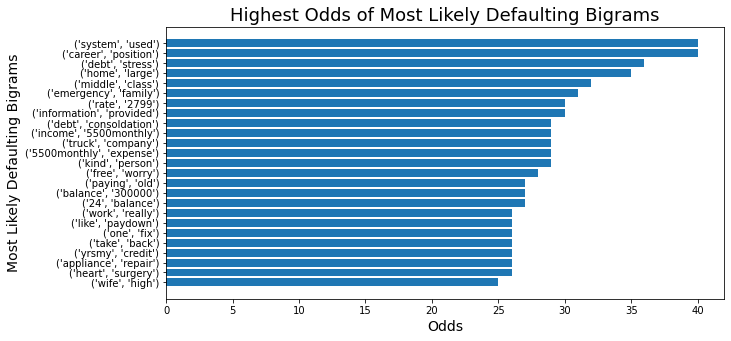

In [939]:
fig, ax = plt.subplots()

y_pos = np.arange(len(high_default_grams))
ax.barh(y_pos, high_default_counts, align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(high_default_grams)
ax.invert_yaxis()
ax.set_xlabel('Odds', size = 14)
ax.set_ylabel('Most Likely Defaulting Bigrams', size = 14)
ax.set_title('Highest Odds of Most Likely Defaulting Bigrams', size = 18)

In [940]:
low_default = sorted(prop2_dict.items(), key=lambda x:x[1], reverse= True)[0:25]
low_default_grams =  [lst[0] for lst in low_default]
low_default_counts =  [lst[1] for lst in low_default]

Text(0.5, 1.0, 'Highest Odds of Least Likely Defaulting Bigrams')

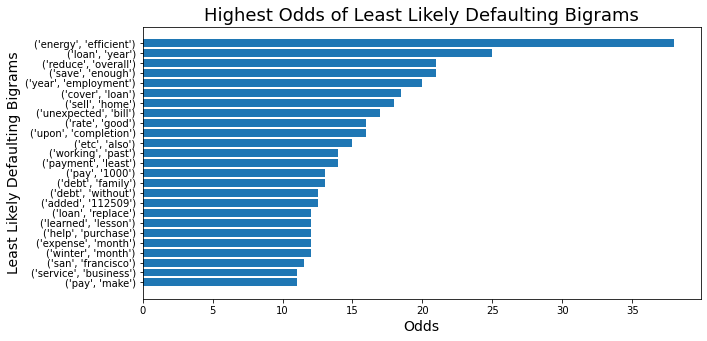

In [941]:
fig, ax = plt.subplots()

y_pos = np.arange(len(low_default_grams))
ax.barh(y_pos, low_default_counts, align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(low_default_grams)
ax.invert_yaxis()
ax.set_xlabel('Odds', size = 14)
ax.set_ylabel('Least Likely Defaulting Bigrams', size = 14)
ax.set_title('Highest Odds of Least Likely Defaulting Bigrams', size = 18)

It seems the bigrams associated with high odds of default mention two key things: 1) family and 2) uncertainty. For instance, words such as "<i><b>stress</b></i>", "<i><b>emergency</b></i>", "<i><b>surgery</b></i>", "<i><b>home</b></i>", "<i><b>family</b></i>", "<i><b>worry</b></i>" and "<i><b>wife</b></i>" are featured in the top 25 bigrams associated with high odds of charge-off. <br> <br> In contrast, the bigrams associated with low odds of defaulting use very specific terminology, with words such as "<i><b>efficient</b></i>", "<i><b>reduce</b></i>", "<i><b>save</b></i>", "<i><b>employment</b></i>", "<i><b>cover</b></i>", "<i><b>sell</b></i>", "<i><b>completion</b></i>" and "<i><b>working</b></i>". Additionally, the text analysis suggests some types of loans such as home improvements are more likely to repay back. The top bigram indicative of repaying behavior is <b><i>("energy", "efficient")</b></i>, suggesting the applicant is trying to remodel their home. Let's verify this below:
 <br> <br>

In [1059]:
count = 0
for i in range(len(upsampled_dta['bigrams'])):
    if count == 5:
        break
    if ('energy', 'efficient') in upsampled_dta['bigrams'][i]:
        print(upsampled_dta['desc'][i])
        print('\n \n')
        count += 1

  561620 added on 10/22/09 > Going to use funds to purchase new energy efficient windows for my house to help keep down the heating costs this winter.

 

  Borrower added on 08/17/10 > Making energy efficient, green upgrades to home. Insulation and windows.<br/>

 

  Borrower added on 07/11/11 > We've been in our current home for 11 1/2years and would like to install a new 16seer 13eer a/c and water heater to have a more energy efficient home,and upgrade our guest bathroom.You can confirm with Credit Karma I pay my bills on time.Part of this money will be used to pay offf my credit cards.The company i have been working for the past 5years 3months has been in business for 30 plus years.<br/>

 

  Borrower added on 06/09/10 > Energy effecient home improvements<br/> Borrower added on 06/10/10 > Purpose of Loan, detailed description continued, as follows:<br/><br/>Energy Efficient Home Improvements/Whole House Weatherization-needed, including insulation, ceiling finish, doors, windows a

Indeed, based on reading the loan descriptions, it seems the bigram <b><i>("energy", "efficient")</b></i> is associated with home improvement. Now let's see if common bigrams as features improve performance.

In [1117]:
top_bigrams = {}

for key in chgoff_dict.keys():
    top_bigrams[key] = chgoff_dict[key] + paid_dict[key]    

In [1134]:
# select the most common bigrams
# top_bigrams = sorted(top_bigrams.items(), key=lambda x:x[1], reverse= True)[0:200]

top_bigrams = [x[0] for x in low_default + high_default]


In [1135]:
upsampled_dta['clean_desc'] = new_list

In [1136]:
bigrams_list = []

for text in new_list:
    bigrams = list(ngrams(nltk.word_tokenize(text), 2))
    bigrams_list.append(bigrams)

In [1137]:
upsampled_dta['bigrams'] = bigrams_list

In [1138]:
i = 1

for bigram in top_bigrams:        
    mask = upsampled_dta['bigrams'].apply(lambda x: bigram in x)
    upsampled_dta['bigram' + str(i)] = mask.astype(int)    
    i+= 1    

# Modelling with bigrams as features

In [1139]:
my_features['row_n'] = np.arange(len(my_features))
text_features = upsampled_dta.loc[:,'bigram1':'bigram50']
text_features['row_n'] = np.arange(len(text_features))

In [1140]:
my_features = my_features.merge(text_features, left_on = 'row_n', right_on = 'row_n')

In [1141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 432)
X = my_features.drop('id', 1)
y = upsampled_dta['target'].astype(int)

X_train.columns = X_train.columns.str.replace(",", "")
X_train.columns = X_train.columns.str.replace(">", "")
X_train.columns = X_train.columns.str.replace("<", "")
X_test.columns = X_train.columns.str.replace(",", "")
X_test.columns = X_train.columns.str.replace(">", "")
X_test.columns = X_train.columns.str.replace("<", "")

In [1142]:
log_reg = LogisticRegression(random_state = 999, solver = 'lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=999)

In [1143]:
rf = RandomForestClassifier(random_state = 123, max_depth = 20, n_estimators = 40)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=40, random_state=123)

In [1144]:
xtreme = xgb.XGBClassifier(objective = 'binary:logistic', 
                            eval_metric = "logloss",
                            seed = 42, 
                            use_label_encoder = False)

xtreme.fit(X_train, 
           y_train, 
           verbose = True, 
           early_stopping_rounds = 20, 
           eval_metric= 'aucpr', 
           eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.65729
[1]	validation_0-aucpr:0.67060
[2]	validation_0-aucpr:0.68724
[3]	validation_0-aucpr:0.69150
[4]	validation_0-aucpr:0.69603
[5]	validation_0-aucpr:0.70209
[6]	validation_0-aucpr:0.70669
[7]	validation_0-aucpr:0.71076
[8]	validation_0-aucpr:0.71330
[9]	validation_0-aucpr:0.71910
[10]	validation_0-aucpr:0.72198
[11]	validation_0-aucpr:0.72573
[12]	validation_0-aucpr:0.72810
[13]	validation_0-aucpr:0.72948
[14]	validation_0-aucpr:0.73122
[15]	validation_0-aucpr:0.73156
[16]	validation_0-aucpr:0.73473
[17]	validation_0-aucpr:0.73594
[18]	validation_0-aucpr:0.73652
[19]	validation_0-aucpr:0.73983
[20]	validation_0-aucpr:0.74014
[21]	validation_0-aucpr:0.74032
[22]	validation_0-aucpr:0.74198
[23]	validation_0-aucpr:0.74286
[24]	validation_0-aucpr:0.74516
[25]	validation_0-aucpr:0.74548
[26]	validation_0-aucpr:0.74752
[27]	validation_0-aucpr:0.74803
[28]	validation_0-aucpr:0.74860
[29]	validation_0-aucpr:0.75048
[30]	validation_0-aucpr:0.75042
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=32,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [1145]:
temp = X_test.merge(y_test, left_index=True, right_index=True)
temp.drop_duplicates(inplace=True)

y_test = temp['target']
X_test = temp.drop('target', 1)

In [1146]:
logit_y_pred = log_reg.predict(X_test)
rf_y_pred = rf.predict(X_test)
xgb_y_pred = xtreme.predict(X_test)

logit_probs = log_reg.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)
xgb_probs = xtreme.predict_proba(X_test)

[[3812 3025]
 [3009 3790]]


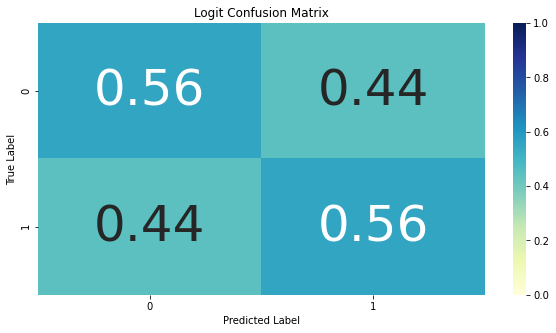

Precision:  0.557434916899544
Recall:  0.5561261922230374
AUC:  0.5574946999299534
[[5658 1179]
 [ 494 6305]]


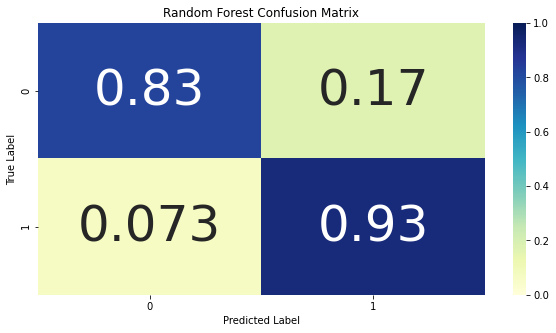

Precision:  0.9273422562141491
Recall:  0.8424639230358097
AUC:  0.8774491009021601
[[4950 1887]
 [1367 5432]]


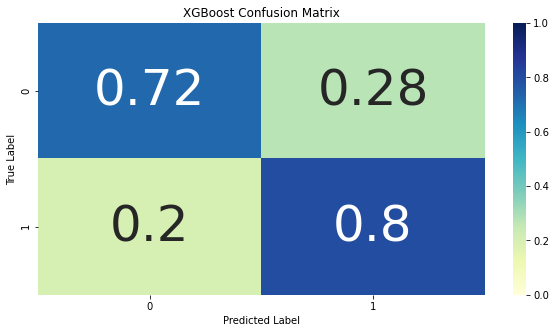

Precision:  0.7989410207383438
Recall:  0.7421778931548025
AUC:  0.7614713879470569


In [1147]:
logit_cm = confusion_matrix(y_test, logit_y_pred)
logit_cm_norm = logit_cm / logit_cm.sum(axis = 1).reshape(-1,1)
plot_conf_mtx(logit_cm_norm, logit_y_pred, classes = log_reg.classes_, title = "Logit Confusion Matrix")

rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm_norm = rf_cm / rf_cm.sum(axis = 1).reshape(-1,1)
plot_conf_mtx(rf_cm_norm, rf_y_pred, classes = rf.classes_, title = "Random Forest Confusion Matrix")

xgb_cm = confusion_matrix(y_test, xgb_y_pred)
xgb_cm_norm = xgb_cm / xgb_cm.sum(axis = 1).reshape(-1,1)
plot_conf_mtx(xgb_cm_norm, xgb_y_pred, classes = xtreme.classes_, title = "XGBoost Confusion Matrix")

Compared with the model that only incorporates financial information, the combining financial information and text information improved recall but worsened precision in all three models. What this suggests is that incorporating text information makes the model over-predict charge-offs, avoiding more Type 2 errors at the expense of committing more Type 1 error.s.

Random Forest remains as the superior model for default prediction. 